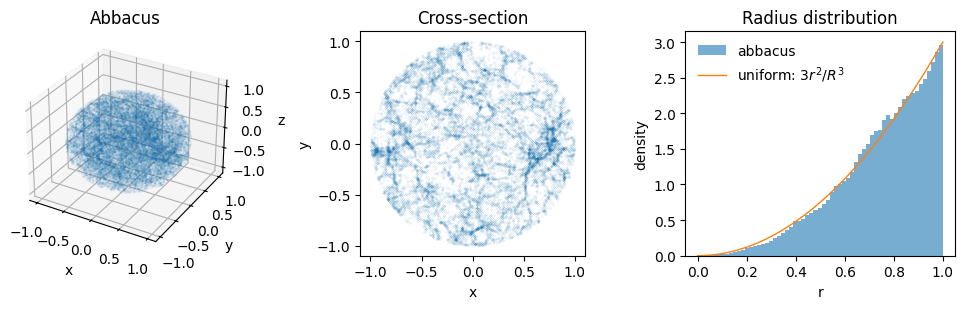

## Two-point correlation function $\xi(r)$ — Landy-Szalay estimator

The gold-standard statistic in LSS analysis. Measures *excess* probability of
finding a pair at separation $r$ relative to a homogeneous Poisson process:

$$\xi(r) = \frac{DD(r) - 2\,DR(r) + RR(r)}{RR(r)}$$

where $DD$, $DR$, $RR$ are normalised pair counts (data–data, data–random,
random–random).  Computed efficiently via `KDTree.count_neighbors`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def traj_Landy_Szalay(traj, snapshots, N_sub=50_000, bins=20):
    traj_list = [traj[i] for i in snapshots]
    xi_s = []
    for data in traj_list:
        r, xi = Landy_Szalay(data, N_sub=N_sub, n_bins_xi=bins)
        xi_s.append(xi)
    return r, xi_s
        

def plot_trajs(traj, snapshots, figsize=(12, 6),  dpi=120, marker_size=0.01, color='k', marker=',', alpha=1.0, save_fig=None, orientation=(30, -60)):
    N = len(snapshots)
    traj_list = [traj[i].cpu().numpy() for i in snapshots]
    time_steps = [round(float(x)/snapshots[-1],2) for x in snapshots]
    elev, azim = orientation
    fig = plt.figure(figsize=figsize, dpi=dpi)
    for i, data in enumerate(traj_list):
        ax = fig.add_subplot(1, N, i+1, projection='3d')
        ax.view_init(elev=elev, azim=azim)
        ax.grid(False)
        ax.set_title(f't={time_steps[i]}')        

        ax.scatter3D(data[:,0], data[:,1], data[:,2], s=marker_size, c=color, marker=marker, alpha=alpha)
        
        # Draw full cube
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        zlim = ax.get_zlim()
        
        # Construct corners
        corners = np.array([
            [xlim[0], ylim[0], zlim[0]],
            [xlim[1], ylim[0], zlim[0]],
            [xlim[1], ylim[1], zlim[0]],
            [xlim[0], ylim[1], zlim[0]],
            [xlim[0], ylim[0], zlim[1]],
            [xlim[1], ylim[0], zlim[1]],
            [xlim[1], ylim[1], zlim[1]],
            [xlim[0], ylim[1], zlim[1]]
        ])
        
        # Edges
        edges = [
            (0,1), (1,2), (2,3), (3,0), # Bottom
            (4,5), (5,6), (6,7), (7,4), # Top
            (0,4), (1,5), (2,6), (3,7)  # Vertical
        ]
        
        for start, end in edges:
            ax.plot3D(
                [corners[start,0], corners[end,0]],
                [corners[start,1], corners[end,1]],
                [corners[start,2], corners[end,2]],
                'k--', linewidth=0.5
            )
        
        ax.set_axis_off()

    if save_fig is not None:
        plt.savefig(save_fig, dpi=dpi)
        
    plt.show()
    plt.close()


## Results

In [ ]:
import torch
from pathlib import Path

from utils import BASE_DIR, PROJECT
from data.datasets import AbbacusData, Uniform3D
from utils.plotting import plot_lss_slices, plot_lss_results
from utils.data import Landy_Szalay

exp_id = 'a5ee61bc36d3419384e4dc3346a21fb6'
exp_dir = Path(BASE_DIR, PROJECT, exp_id)
traj = torch.load(exp_dir / "trajectories.pt")

abbacus = AbbacusData(datafile='/pscratch/sd/d/dfarough/LSS_data/halo_positions.npy')
truth = abbacus.sample()
r, xi_abbacus = Landy_Szalay(truth, N_sub=100_000, n_bins_xi=100)

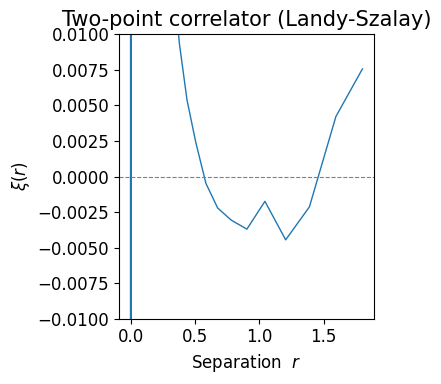

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(r, xi_abbacus, lw=1, label=r"$\xi(r)$ Landy-Szalay")
ax.axhline(0, color='grey', ls='--', lw=0.8)
ax.set_xlabel("$r$")
ax.set_ylabel(r"$\xi(r)$")
ax.set_title("2-point correlator (Landy-Szalay)", footnote=12)
ax.set_ylim(-0.01,.01)
plt.tight_layout()
plt.show()

In [ ]:


def traj_Landy(traj, snapshots, N_sub=15_000, bins=20):
    N = len(snapshots)
    traj_list = [traj[i] for i in snapshots]
    xi_s = []
    for i, data in enumerate(traj_list):
        r, xi = Landy_Szalay(data, N_sub=N_sub, n_bins_xi=bins)
        xi_s.append(xi)
    return r, xi_s
        

def plot_trajs(traj, snapshot_list, figsize=(12, 6),  dpi=120, marker_size=0.01, color='k', marker=',', alpha=1.0, save_fig=None, orientation=(30, -60)):
    N = len(snapshot_list)
    traj_list = [traj[i].cpu().numpy() for i in snapshot_list]
    time_steps = [round(float(x)/snapshot_list[-1],2) for x in snapshot_list]
    elev, azim = orientation
    fig = plt.figure(figsize=figsize, dpi=dpi)
    for i, data in enumerate(traj_list):
        ax = fig.add_subplot(1, N, i+1, projection='3d')
        ax.view_init(elev=elev, azim=azim)
        ax.grid(False)
        ax.set_title(f't={time_steps[i]}')        

        ax.scatter3D(data[:,0], data[:,1], data[:,2], s=marker_size, c=color, marker=marker, alpha=alpha)
        
        # Draw full cube
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        zlim = ax.get_zlim()
        
        # Construct corners
        corners = np.array([
            [xlim[0], ylim[0], zlim[0]],
            [xlim[1], ylim[0], zlim[0]],
            [xlim[1], ylim[1], zlim[0]],
            [xlim[0], ylim[1], zlim[0]],
            [xlim[0], ylim[0], zlim[1]],
            [xlim[1], ylim[0], zlim[1]],
            [xlim[1], ylim[1], zlim[1]],
            [xlim[0], ylim[1], zlim[1]]
        ])
        
        # Edges
        edges = [
            (0,1), (1,2), (2,3), (3,0), # Bottom
            (4,5), (5,6), (6,7), (7,4), # Top
            (0,4), (1,5), (2,6), (3,7)  # Vertical
        ]
        
        for start, end in edges:
            ax.plot3D(
                [corners[start,0], corners[end,0]],
                [corners[start,1], corners[end,1]],
                [corners[start,2], corners[end,2]],
                'k--', linewidth=0.5
            )
        
        ax.set_axis_off()

    if save_fig is not None:
        plt.savefig(save_fig, dpi=dpi)
        
    plt.show()
    plt.close()

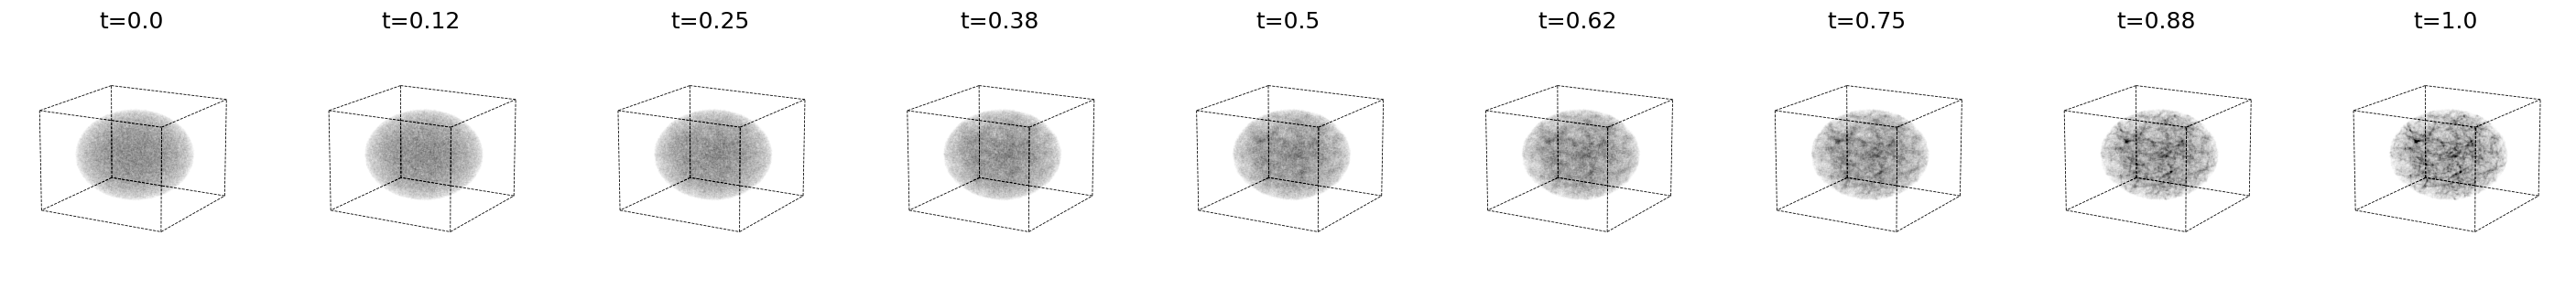

In [8]:
snapshots = [0,16,32,48,64,80,96,112,128]
plot_trajs(traj, snapshots, marker=',', marker_size=0.04, alpha=0.005,  figsize=(30,5), save_fig= exp_dir / "abbacus_traj.png", orientation=(15,30))


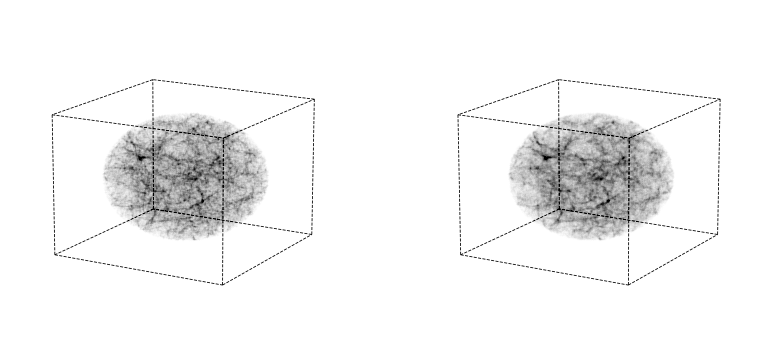

In [7]:
plot_lss_results(truth, traj[-1], marker=',', marker_size=0.1, alpha=0.005, colors=['k','k'],figsize=(8,4), save_fig= exp_dir / "abbacus_traj.png", orientation=(15,30))


In [ ]:
snapshots = [0,16,32,48,64,80,96,112,128]
r, xis = traj_Landy(traj, snapshots, N_sub=100_000, bins=100)


traj_list = [traj[i] for i in snapshots]
time_steps = [round(float(x)/snapshots[-1],2) for x in snapshots]
fig, ax = plt.subplots(figsize=(10,5))
colors = ['k', 'sienna', 'firebrick', 'crimson', 'r','chocolate','orangered', 'darkorange', 'orange'][::-1]
for i, data in enumerate(traj_list):
    ax.plot(r, xis[i], lw=0.8, color=colors[i], label=f't={time_steps[i]}')
ax.plot(r, xi_abbacus, lw=0.8, color='k', ls='--', label=f'abbacus')
ax.set_title("Two-point correlator (Landy-Szalay)", fontsize=12)
ax.axhline(0, color='grey', ls=':', lw=0.8, label='uniform')
ax.legend(frameon=False, fontsize=7, ncol=2)
ax.set_ylim(-0.006,0.012)
ax.set_xlabel('r')
ax.set_ylabel(r'$\xi(r)$')
# log x
# ax.set_xscale('log')
ax.set_xlim(0.05, r[-1])
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x, y, z = abbacus_truth[:,0], abbacus_truth[:,1], abbacus_truth[:,2]
r = torch.linalg.norm(abbacus_truth, dim=1)
N = r.numel()
R = float(r.max())  

fig = plt.figure(figsize=(10, 3.2))

# Abbacus scatter

ax0 = fig.add_subplot(131, projection='3d')
ax0.scatter(x, y, z, s=0.001, alpha=0.1, marker=',')
ax0.set_title("Abbacus")
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.set_zlabel("z")

# (x,y) cross-section: thin slab around z=0
ax1 = fig.add_subplot(132)
zabs = z.abs()
slab = 0.05 * R
mask = zabs < slab
ax1.scatter(x[mask], y[mask], s=0.01, alpha=0.3)
ax1.set_aspect('equal', adjustable='box')
ax1.set_title(f"Cross-section")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# Radius density. For uniform: p(r)=3 r^2 / R^3
ax2 = fig.add_subplot(133)
ax2.hist(r.numpy(), bins=60, density=True, alpha=0.6, label="abbacus")
rho = torch.linspace(0, R, 400)
pdf = 3.0 * (rho**2) / (R**3 + 1e-12)
ax2.plot(rho.numpy(), pdf.numpy(), linewidth=1, label=r"uniform: $3r^2/R^3$")
ax2.set_title("Radius distribution")
ax2.set_xlabel("r")
ax2.set_ylabel("density")
ax2.legend(frameon=False)

plt.tight_layout()
plt.show()
